In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [5]:
df.shape

(19237, 18)

In [6]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [7]:
df.duplicated().sum()

313

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#df.reset_index()

In [10]:
df.shape

(18924, 18)

In [11]:
#df=df.rename(columns={"Mileage":"Driven km"})


In [12]:
#df['Price'].sort_values(ascending=False).head(10).value_counts()

In [13]:
#outliers=np.where(df["Price"] > 47161.0)[0]
#outliers

In [14]:
df['Age']=2024-df['Prod. year']

In [15]:
df=df.drop(columns=['ID','Prod. year'])

In [16]:
df.describe(include='all')

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
count,1.892400e+04,18924,18924,18924,18924,18924,18924,18924,18924,18924.000000,18924,18924,18924,18924,18924,18924.000000,18924.000000
unique,NaN,559,65,1590,11,2,7,107,7687,NaN,4,3,3,2,16,NaN,NaN
top,NaN,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN,NaN
freq,NaN,5709,3729,1069,8600,13731,9944,3856,714,NaN,13282,12695,18032,17471,4944,NaN,NaN
mean,1.858744e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.580216,NaN,NaN,NaN,NaN,NaN,6.568379,13.085764
std,1.921356e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200223,NaN,NaN,NaN,NaN,NaN,4.322323,5.665749
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000
25%,5.331000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,9.000000
50%,1.317200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000
75%,2.206300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000,15.000000


In [17]:
df.nunique()

Price               2315
Levy                 559
Manufacturer          65
Model               1590
Category              11
Leather interior       2
Fuel type              7
Engine volume        107
Mileage             7687
Cylinders             13
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
Age                   54
dtype: int64

#### Price

In [18]:
print(df['Price'].value_counts())
print(df['Price'].unique())
df["Price"].nunique()

Price
15681    274
470      264
392      237
14113    236
10976    233
        ... 
54954      1
62493      1
14122      1
46490      1
22075      1
Name: count, Length: 2315, dtype: int64
[13328 16621  8467 ... 56814 63886 22075]


2315

#### Levy

In [19]:
#df["Levy"]=pd.to_numeric(df["Levy"],errors="coerce")

In [20]:
df["Levy"]=df['Levy'].replace(['-'],np.nan).astype(float)
df["Levy"]=df["Levy"].fillna(df['Levy'].mean())
df['Levy']=df['Levy'].astype(int)
print(df['Levy'].isnull().sum())
print(df['Levy'].value_counts())

0
Levy
906     5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64


In [21]:
print(df['Levy'].unique())
df["Levy"].nunique()

[ 1399  1018   906   862   446   891   761   751   394  1053  1055  1079
   810  2386  1850   531   586  1249  2455   583  1537  1288   915  1750
   707  1077  1486  1091   650   382  1436  1194   503  1017  1104   639
   629   919   781   530   640   765   777   779   934   769   645  1185
  1324   830  1187  1111   760   642  1604  1095   966   473  1138  1811
   988   917  1156   687 11714   836  1347  2866  1646   259   609   697
   585   475   690   308  1823  1361  1273   924   584  2078   831  1172
   893  1872  1885  1266   447  2148  1730   730   289   502   333  1325
   247   879  1342  1327  1598  1514  1058   738  1935   481  1522  1282
   456   880   900   798  1277   442  1051   790  1292  1047   528  1211
  1493  1793   574   930  1998   271   706  1481  1677  1661  1286  1408
  1090   595  1451  1267   993  1714   878   641   749  1511   603   353
   877  1236  1141   397   784  1024  1357  1301   770   922  1438   753
   607  1363   638   490   431   565   517   833   

559

#### Manufacturer

In [22]:
print(df['Manufacturer'].value_counts())
print(df['Manufacturer'].unique())
df["Manufacturer"].nunique()

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']


65

#### Model

In [23]:
print(df['Model'].value_counts())
print(df['Model'].unique())
df["Model"].nunique()

Model
Prius                     1069
Sonata                    1067
Camry                      929
Elantra                    910
E 350                      534
                          ... 
1500,1600 Schtufenheck       1
E 420                        1
C 250 luxury                 1
Passat sport                 1
Prius C aqua                 1
Name: count, Length: 1590, dtype: int64
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']


1590

#### Category

In [24]:
print(df['Category'].value_counts())
print(df['Category'].unique())
df["Category"].nunique()

Category
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


11

#### Leather Interior

In [25]:
print(df['Leather interior'].value_counts())
print(df['Leather interior'].unique())
df["Leather interior"].nunique()

Leather interior
Yes    13731
No      5193
Name: count, dtype: int64
['Yes' 'No']


2

#### Fuel type

In [26]:
print(df['Fuel type'].value_counts())
print(df['Fuel type'].unique())
df["Fuel type"].nunique()

Fuel type
Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']


7

#### Engine volume

In [27]:
print(df["Engine volume"].unique())
print(df["Engine volume"].nunique())
df["Engine volume"]=df["Engine volume"].str.replace("Turbo",'').astype(float)
print(df['Engine volume'].isnull().sum())
print(df['Engine volume'].value_counts())

['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3' '2.0 Turbo'
 '2.2 Turbo' '4.7' '1.5' '4.4' '3.0 Turbo' '1.4 Turbo' '3.6' '2.3'
 '1.5 Turbo' '1.6 Turbo' '2.2' '2.3 Turbo' '1.4' '5.5' '2.8 Turbo' '3.2'
 '3.8' '4.6' '1.2' '5' '1.7' '2.9' '0.5' '1.8 Turbo' '2.4 Turbo'
 '3.5 Turbo' '1.9' '2.7' '4.8' '5.3' '0.4' '2.8' '3.2 Turbo' '1.1' '2.1'
 '0.7' '5.4' '1.3 Turbo' '3.7' '1' '2.5 Turbo' '2.6' '1.9 Turbo'
 '4.4 Turbo' '4.7 Turbo' '0.8' '0.2 Turbo' '5.7' '4.8 Turbo' '4.6 Turbo'
 '6.7' '6.2' '1.2 Turbo' '3.4' '1.7 Turbo' '6.3 Turbo' '2.7 Turbo' '4.3'
 '4.2' '2.9 Turbo' '0' '4.0 Turbo' '20' '3.6 Turbo' '0.3' '3.7 Turbo'
 '5.9' '5.5 Turbo' '0.2' '2.1 Turbo' '5.6' '6' '0.7 Turbo' '0.6 Turbo'
 '6.8' '4.5' '0.6' '7.3' '0.1' '1.0 Turbo' '6.3' '4.5 Turbo' '0.8 Turbo'
 '4.2 Turbo' '3.1' '5.0 Turbo' '6.4' '3.9' '5.7 Turbo' '0.9' '0.4 Turbo'
 '5.4 Turbo' '0.3 Turbo' '5.2' '5.8' '1.1 Turbo']
107
0
Engine volume
2.0    4259
2.5    2337
1.8    1918
1.6    1562
1.5    1354
       ... 
3.1       1
7.3

#### Mileage

In [28]:
df['Mileage']=df['Mileage'].str.replace("km","").astype(float)
print(df['Mileage'].unique())
print(df["Mileage"].nunique())

[186005. 192000. 200000. ... 140607. 307325. 186923.]
7687


#### Cylinders

In [29]:
df['Cylinders']=df['Cylinders'].astype("int64")
print(df['Cylinders'].value_counts())
print(df['Cylinders'].unique())
df["Cylinders"].nunique()

Cylinders
4     14159
6      3373
8       976
5       169
3       107
2        42
12       38
1        37
10       12
16        5
7         4
9         1
14        1
Name: count, dtype: int64
[ 6  4  8  1 12  3  2 16  5  7  9 10 14]


13

#### Gear box type

In [30]:
print(df['Gear box type'].value_counts())
print(df['Gear box type'].unique())
df["Gear box type"].nunique()

Gear box type
Automatic    13282
Tiptronic     3065
Manual        1844
Variator       733
Name: count, dtype: int64
['Automatic' 'Tiptronic' 'Variator' 'Manual']


4

#### Drive Wheel

In [31]:
print(df['Drive wheels'].value_counts())
print(df['Drive wheels'].unique())
df["Drive wheels"].nunique()

Drive wheels
Front    12695
4x4       3969
Rear      2260
Name: count, dtype: int64
['4x4' 'Front' 'Rear']


3

#### Doors

In [32]:
print(df["Doors"].unique())
print(df["Doors"].nunique())
df["Doors"]=df["Doors"].replace({'-1':1,'02-Mar':2,'04-May':4,'>5':5})
df["Doors"]=df["Doors"].astype('int64')
print(df['Doors'].isnull().sum())
print(df['Doors'].value_counts())

['04-May' '02-Mar' '>5']
3
0
Doors
4    18032
2      768
5      124
Name: count, dtype: int64


#### Wheel

In [33]:
print(df['Wheel'].value_counts())
print(df['Wheel'].unique())
df["Wheel"].nunique()

Wheel
Left wheel          17471
Right-hand drive     1453
Name: count, dtype: int64
['Left wheel' 'Right-hand drive']


2

#### Color

In [34]:
print(df['Color'].value_counts())
print(df['Color'].unique())
df["Color"].nunique()

Color
Black            4944
White            4407
Silver           3729
Grey             2343
Blue             1376
Red               622
Green             321
Orange            252
Brown             185
Carnelian red     177
Golden            143
Beige             134
Sky blue          122
Yellow            105
Purple             39
Pink               25
Name: count, dtype: int64
['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']


16

#### Airbags

In [35]:
print(df['Airbags'].value_counts())
print(df['Airbags'].unique())
df["Airbags"].nunique()

Airbags
4     5733
12    5534
0     2384
8     1569
6     1289
2     1051
10     845
5      104
16      93
7       85
1       76
9       62
3       37
11      33
14      20
15       7
13       2
Name: count, dtype: int64
[12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]


17

#### Age

In [36]:
#print(df['Age'].value_counts())
print(df['Age'].unique())
df["Age"].nunique()

[14 13 18 10  8 11 17 25 27  6 16 12  7 23 29 15 24  5  9 20 26 34 19 21
 39 28 22 31 32 36 47 35 30  4 40 38 33 41 71 60 50 37 81 46 59 48 67 44
 85 56 77 42 43 51]


54

In [37]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Age'],
      dtype='object')

In [38]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Age                 0
dtype: int64

In [39]:
numerical_columns=df.select_dtypes(include=['int64','float64'])
numerical_columns.drop(columns=['Price','Cylinders','Doors'],inplace=True)
numerical_columns.head(2)

,Engine volume,Mileage,Airbags,Age
0,3.5,186005.0,12,14
1,3.0,192000.0,8,13


In [40]:
numerical_columns.columns

Index(['Engine volume', 'Mileage', 'Airbags', 'Age'], dtype='object')

### outliers

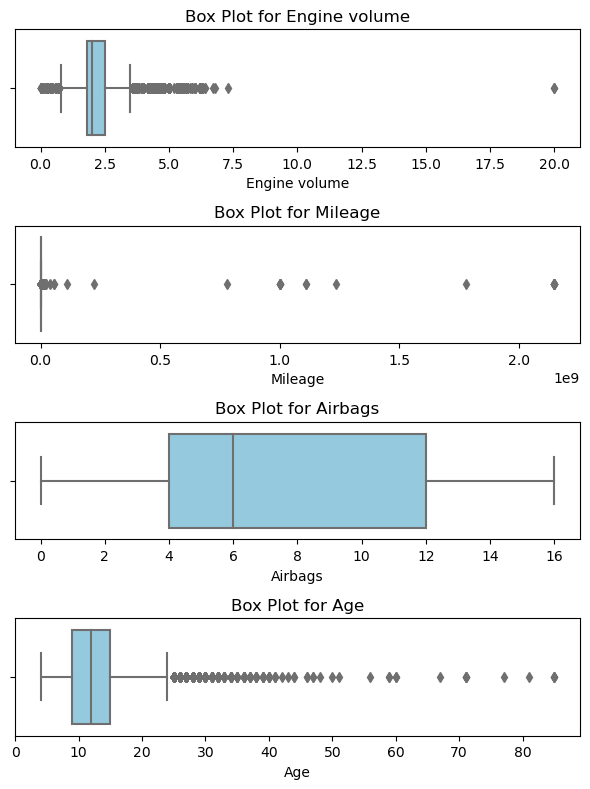

In [41]:
fig,axes=plt.subplots(nrows=4,ncols=1,figsize=(6,8))
# Create boxplots for each column
for i, column in enumerate (numerical_columns):
    sns.boxplot(x=numerical_columns[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [42]:
Q1 = df[numerical_columns.columns].quantile(0.25)
Q3 = df[numerical_columns.columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
    

outliers = ((df[numerical_columns.columns] < lower_bound) | (df[numerical_columns.columns] > upper_bound)).any(axis=1)
df = df[~outliers]


In [43]:
price_column=df['Price']

outliers=(price_column < 2509 )|(price_column > 68145)
num_outliers =np.sum(outliers)
df= df[~outliers]


### Visualisation

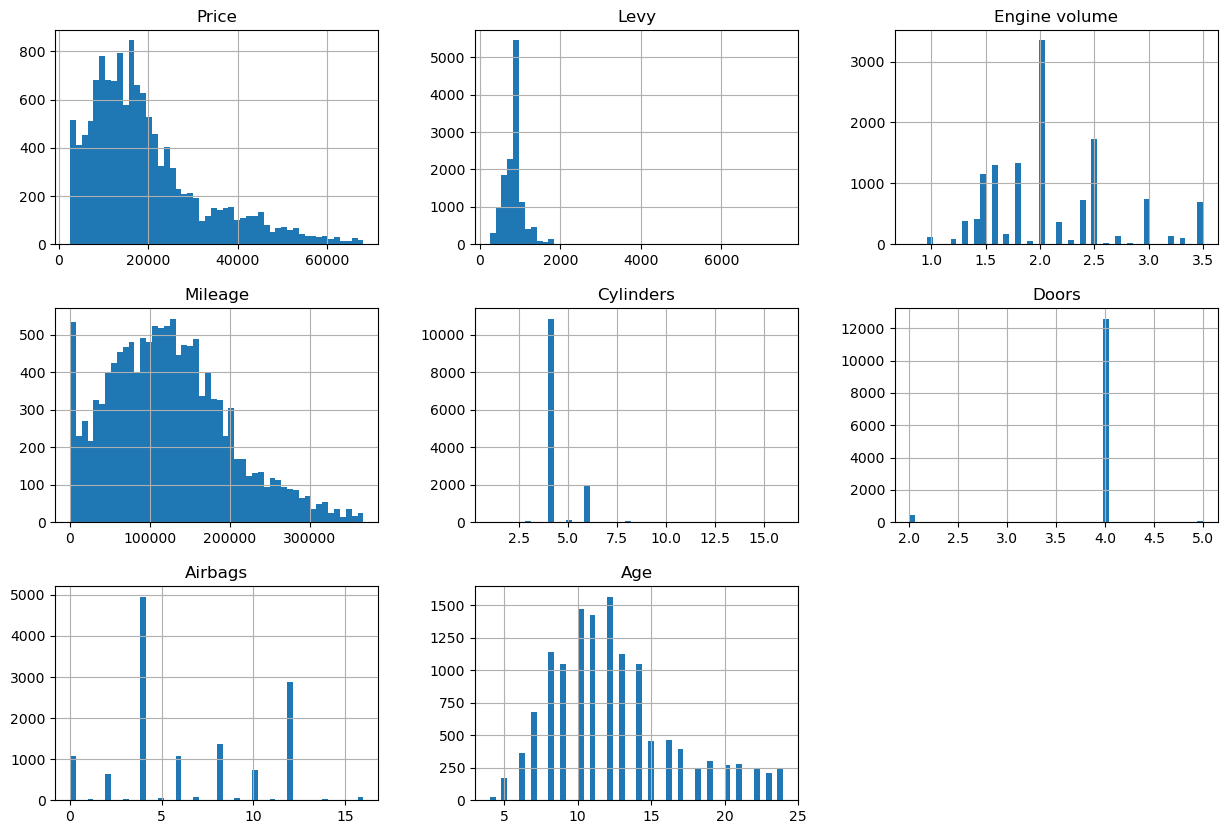

In [44]:
df.hist(bins=50,figsize=(15,10))
plt.show()

Text(0.5, 1.0, 'Histogram of Price')

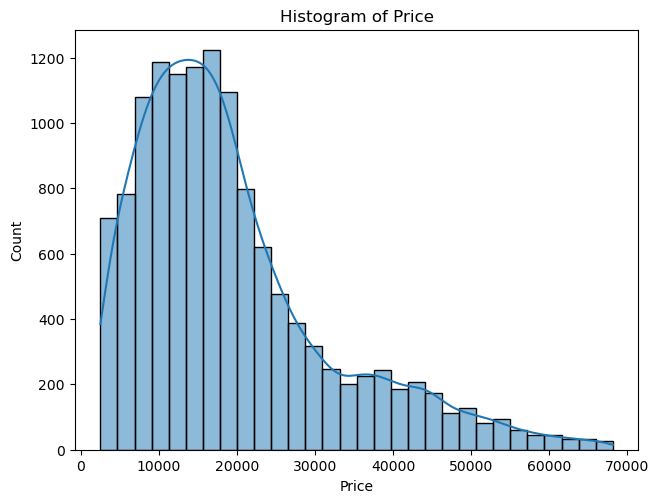

In [45]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 2)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Histogram of Price')

<Axes: xlabel='Levy', ylabel='Price'>

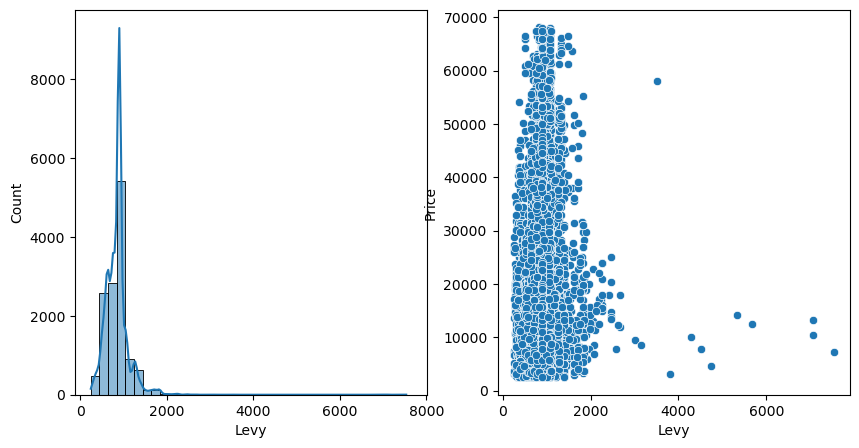

In [46]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(df, ax=ax[0],x="Levy",binwidth = 200, kde=True)
sns.scatterplot(df,ax=ax[1], x='Levy', y='Price')

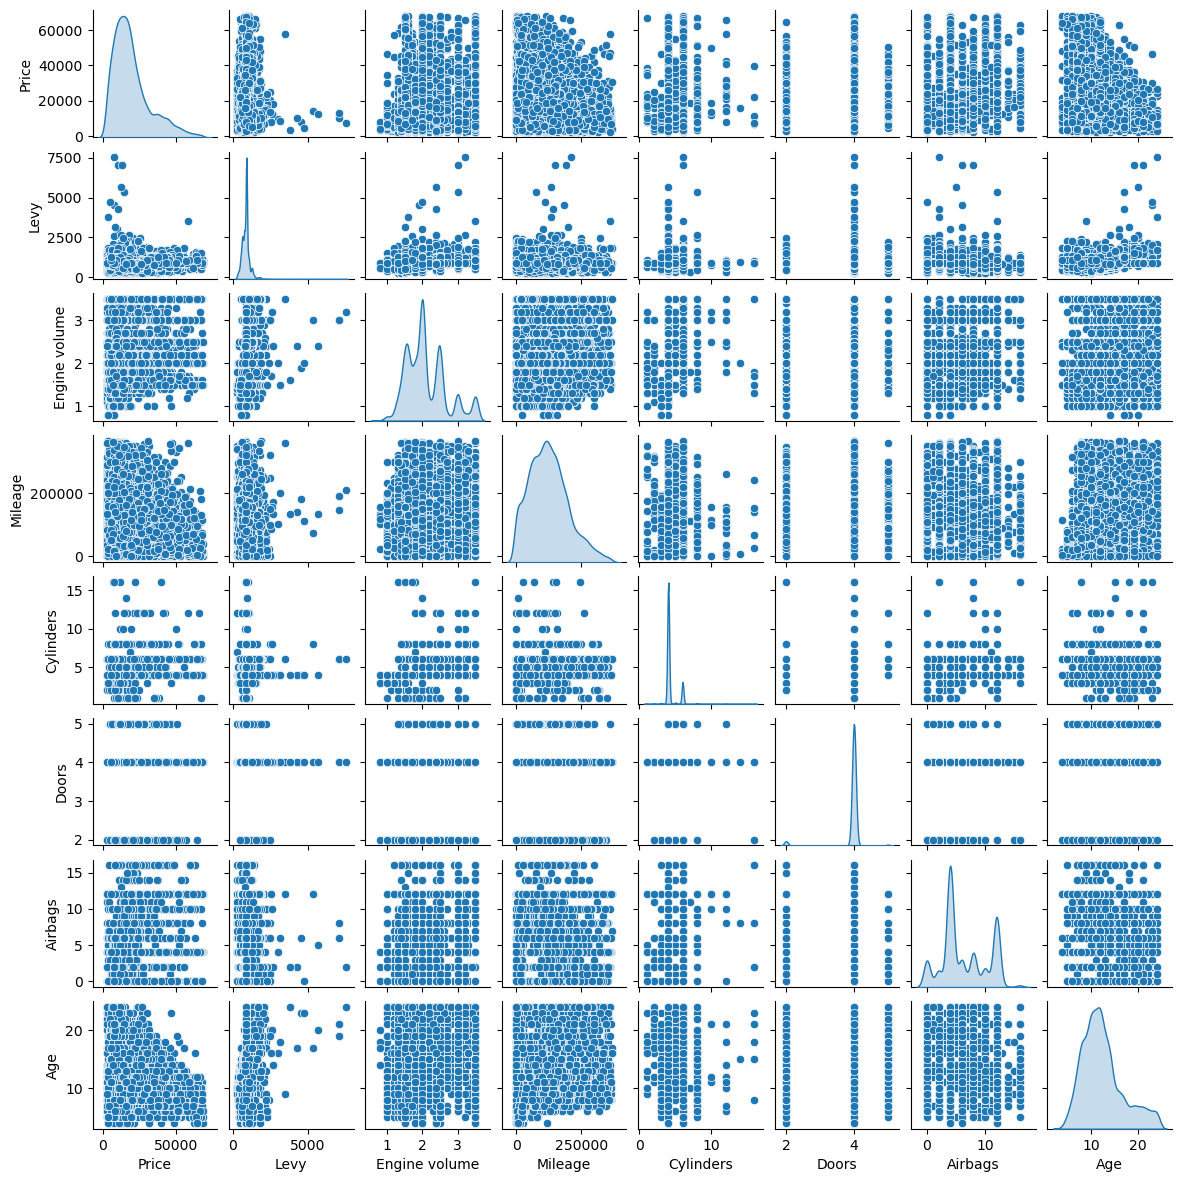

In [47]:
sns.pairplot(df, diag_kind="kde",height=1.5)
plt.show()

<Figure size 1500x1000 with 0 Axes>

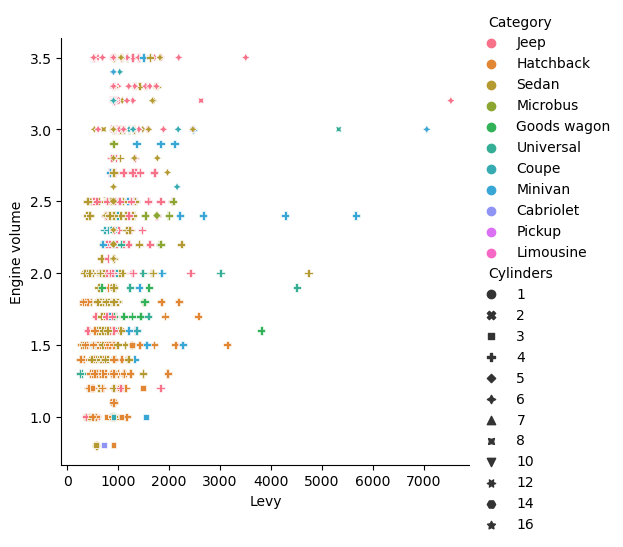

In [48]:
plt.figure(figsize=(15,10))
sns.relplot(x='Levy',y="Engine volume",data=df,hue="Category",style="Cylinders")
plt.show()

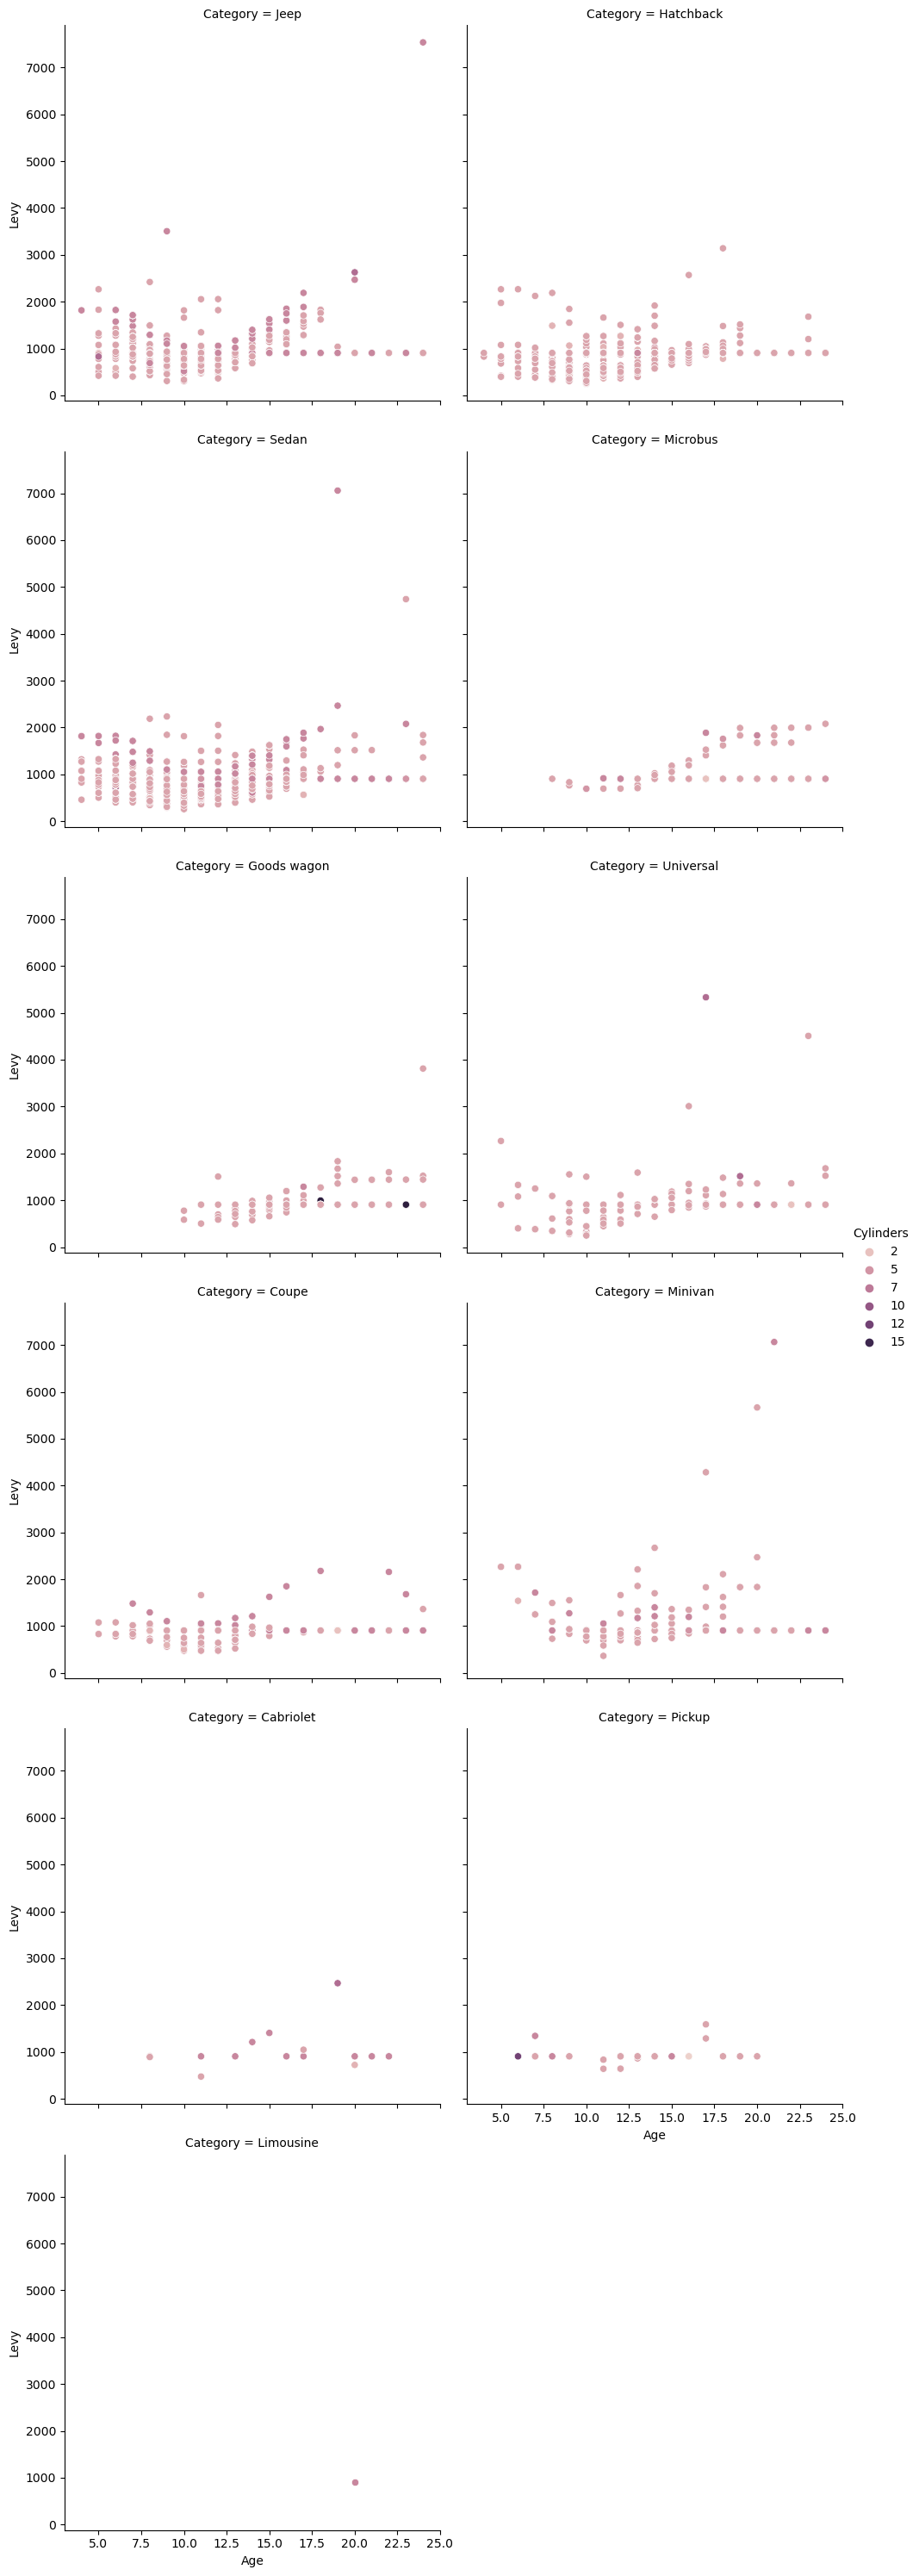

In [49]:

sns.relplot(y='Levy',x='Age',data=df,hue="Cylinders",col="Category",col_wrap=2)
plt.show()

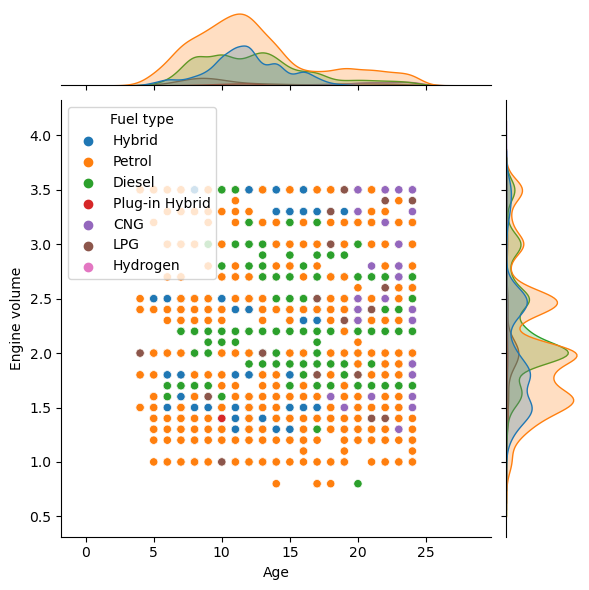

In [50]:
sns.jointplot(y='Engine volume',x="Age",hue='Fuel type',data=df,legend='brief')
plt.show()

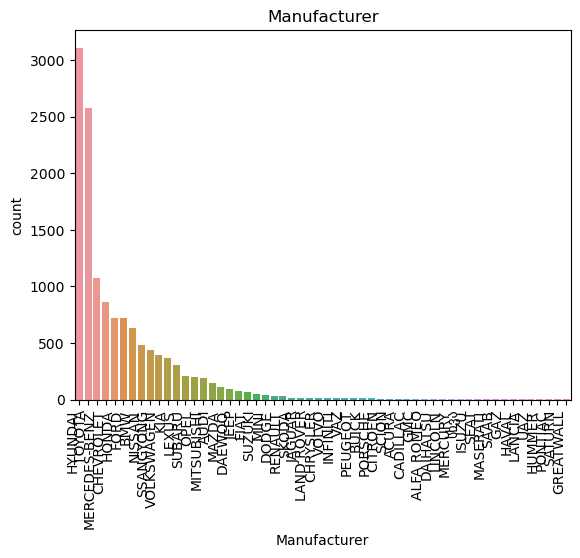

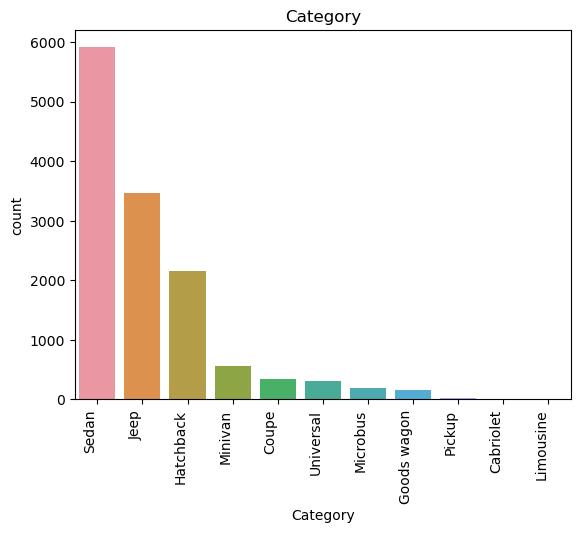

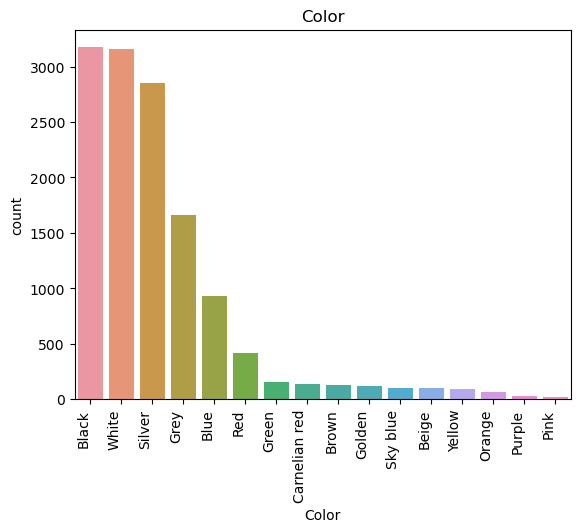

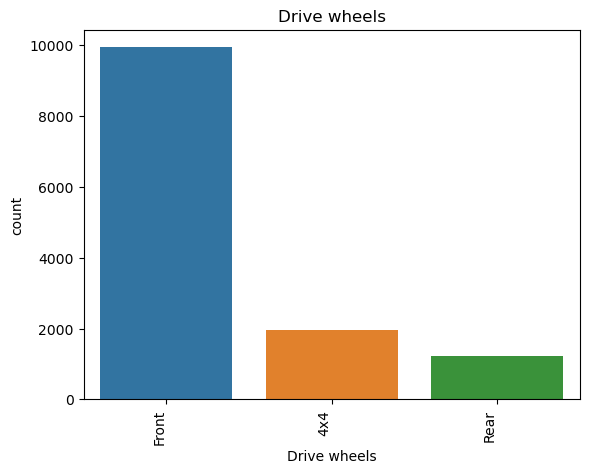

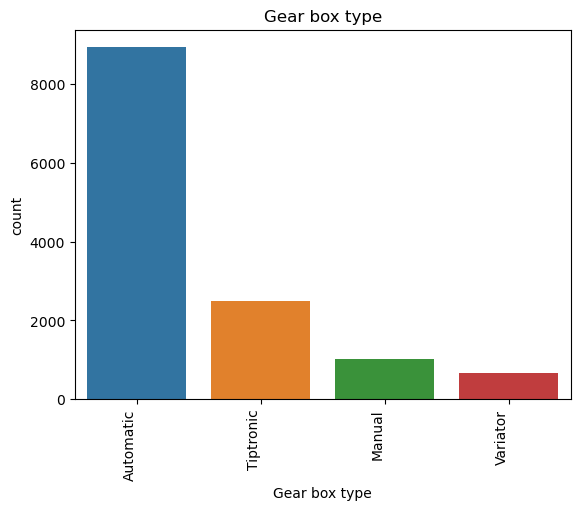

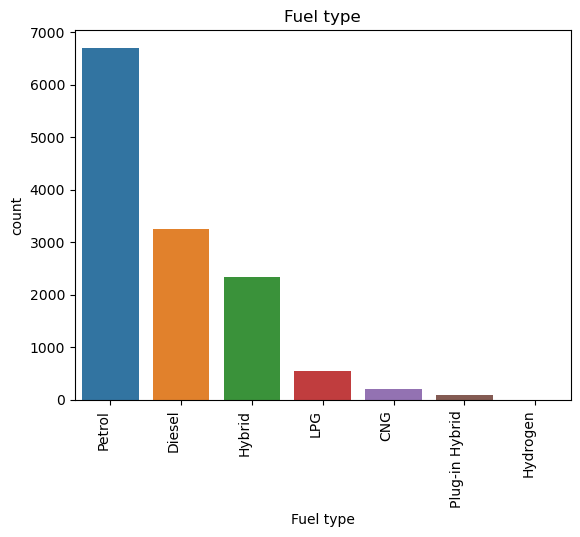

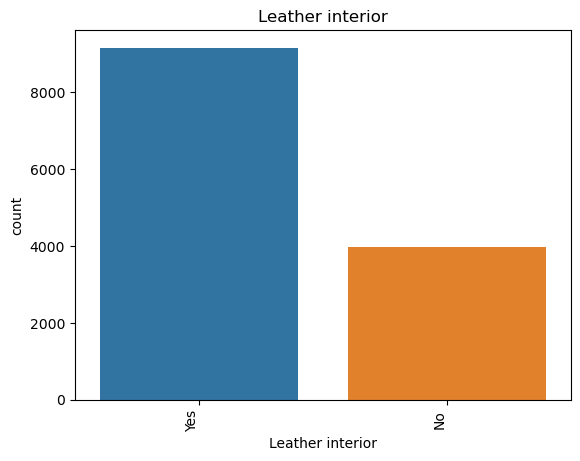

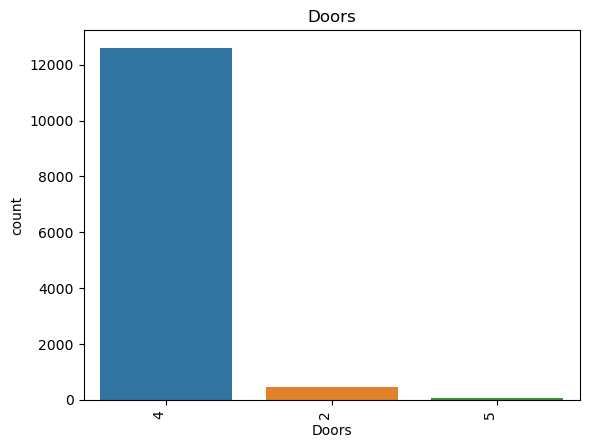

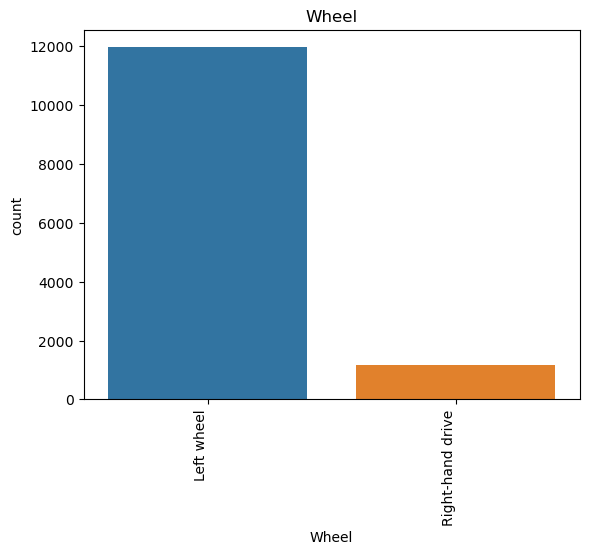

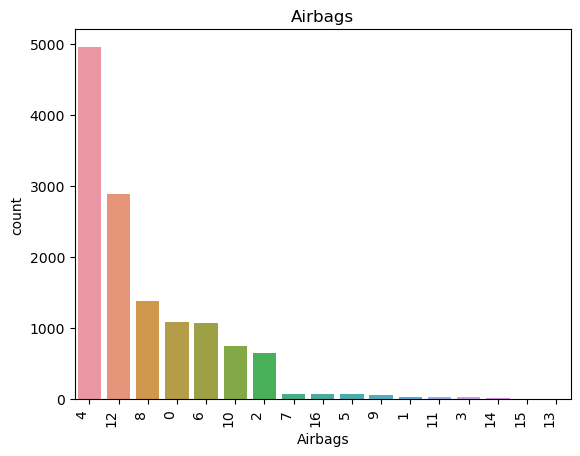

In [51]:
columns = ['Manufacturer','Category','Color', 'Drive wheels', 'Gear box type', 'Fuel type', 'Leather interior','Doors','Wheel','Airbags',]
for column in columns:
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.xticks(rotation=90, ha="right")
    plt.title(column)
    plt.show()

<Axes: xlabel='Manufacturer'>

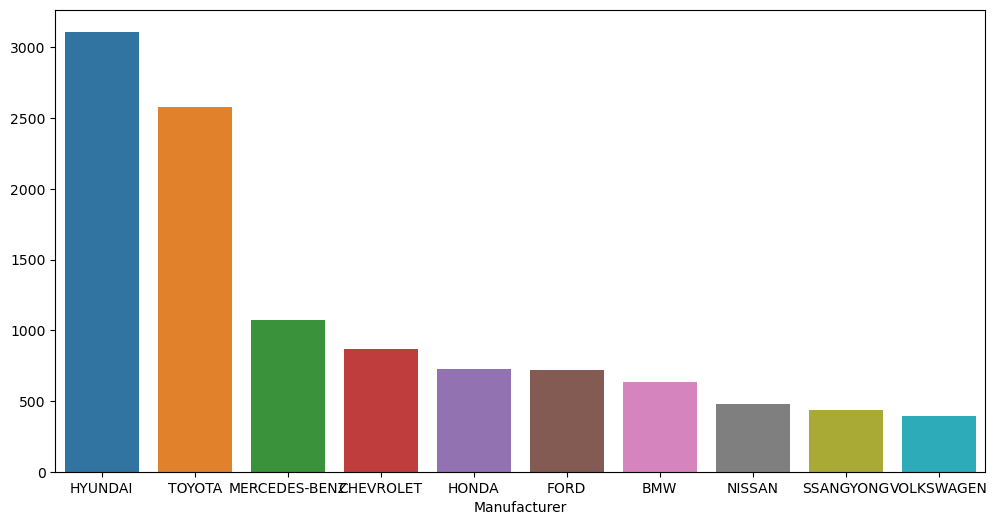

In [52]:
top_10_car = df['Manufacturer'].value_counts(ascending=False).head(10)
#plot top 10 car
plt.figure(figsize=(12,6))
sns.barplot(data=df,x=top_10_car.index,y=top_10_car.values)

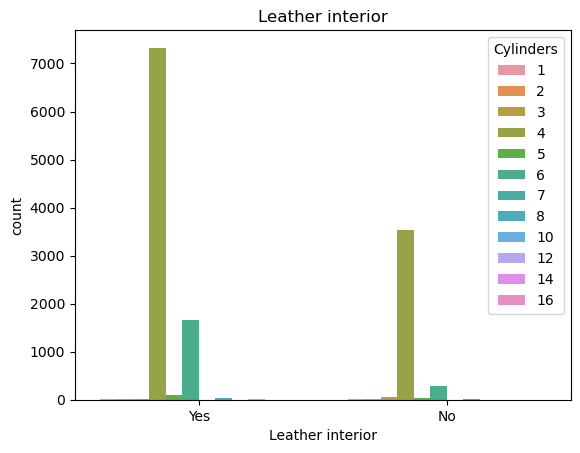

In [53]:
sns.countplot(x='Leather interior',hue="Cylinders",data=df)
plt.title('Leather interior')
plt.show()

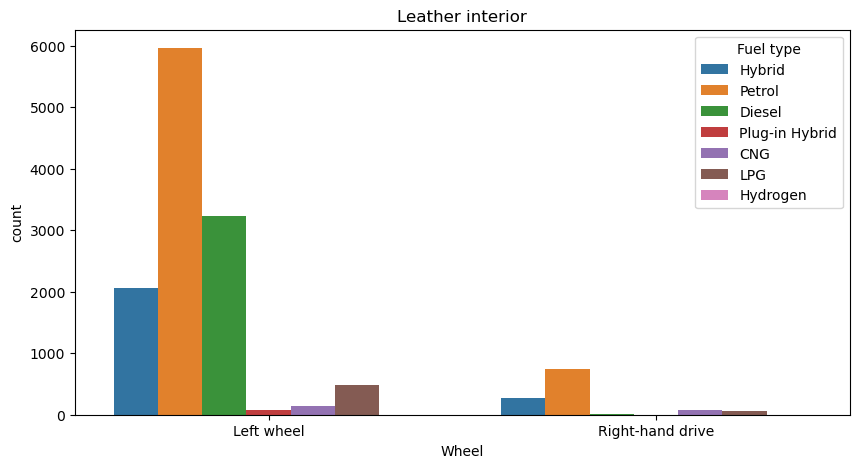

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x='Wheel',hue='Fuel type',data=df)
plt.title('Leather interior')
plt.show()

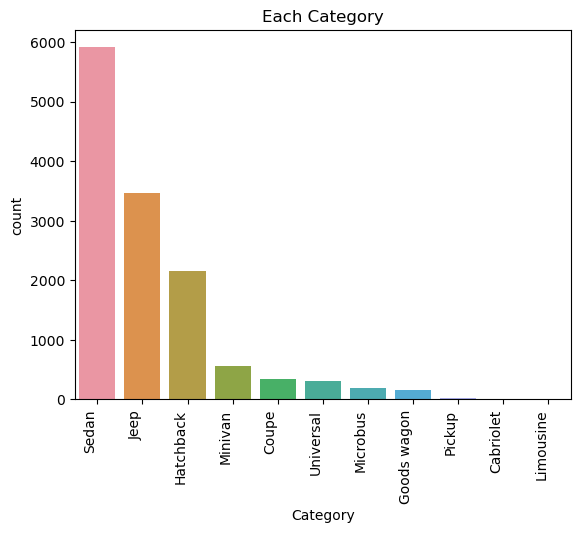

In [55]:
sns.countplot(data=df, x="Category", order=df['Category'].value_counts().index)
plt.xticks(rotation=90, ha="right")
plt.title("Each Category")
plt.show()

<Axes: xlabel='Manufacturer'>

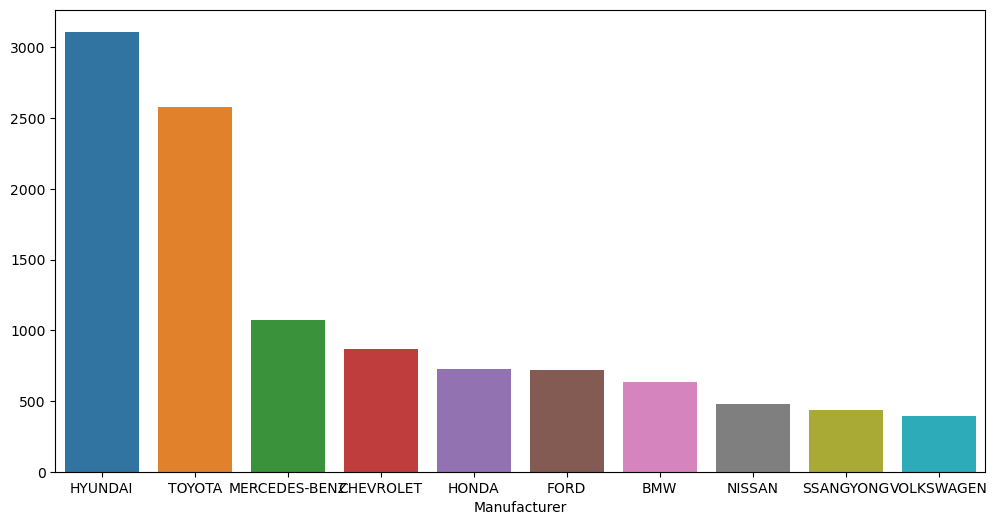

In [56]:
#plot top 10 car
top_10_car = df['Manufacturer'].value_counts(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=df,x=top_10_car.index,y=top_10_car.values)

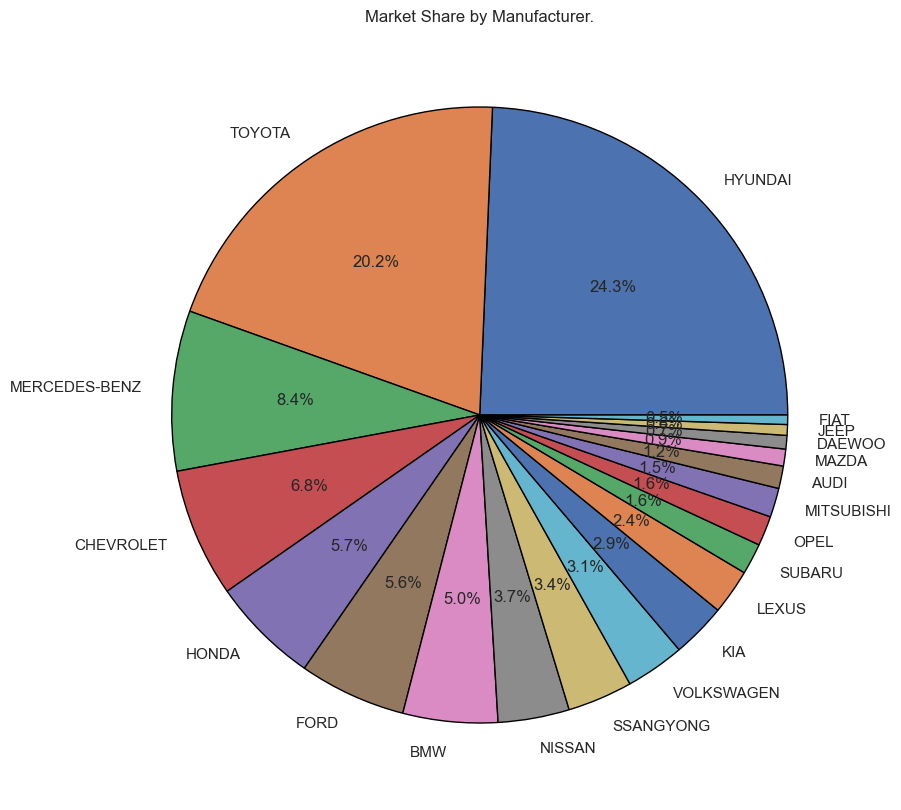

In [57]:
manufacturer_counts = df['Manufacturer'].sort_values(ascending=False).value_counts().head(20)

# Draw a Pieplot
plt.figure(figsize=(10,10))
sns.set(style="dark")

manufacturer_counts.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Market Share by Manufacturer.')
plt.ylabel('')  # Remove y-axis label
plt.show()

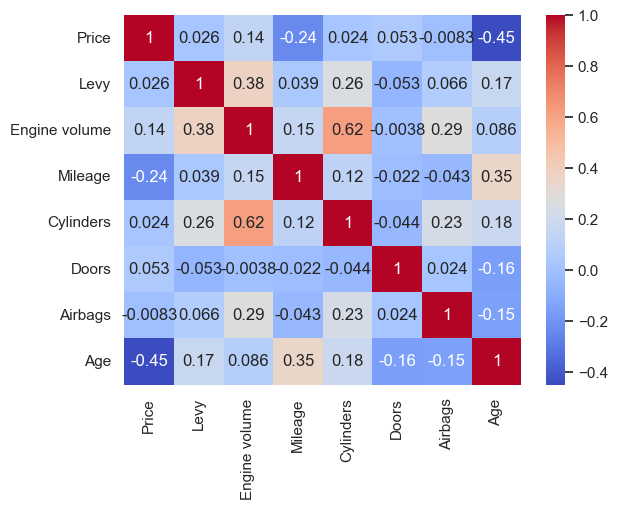

In [58]:
cor=df.corr(numeric_only=True)
#plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13135 entries, 0 to 19235
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13135 non-null  int64  
 1   Levy              13135 non-null  int32  
 2   Manufacturer      13135 non-null  object 
 3   Model             13135 non-null  object 
 4   Category          13135 non-null  object 
 5   Leather interior  13135 non-null  object 
 6   Fuel type         13135 non-null  object 
 7   Engine volume     13135 non-null  float64
 8   Mileage           13135 non-null  float64
 9   Cylinders         13135 non-null  int64  
 10  Gear box type     13135 non-null  object 
 11  Drive wheels      13135 non-null  object 
 12  Doors             13135 non-null  int64  
 13  Wheel             13135 non-null  object 
 14  Color             13135 non-null  object 
 15  Airbags           13135 non-null  int64  
 16  Age               13135 non-null  int64  
dty

In [61]:
le=LabelEncoder()
df.Manufacturer=le.fit_transform(df.Manufacturer)
df.Model=le.fit_transform(df.Model)
df.Category=le.fit_transform(df.Category)
df["Leather interior"]=le.fit_transform(df['Leather interior'])
df['Fuel type']=le.fit_transform(df['Fuel type'])
df['Gear box type']=le.fit_transform(df["Gear box type"])
df['Drive wheels']=le.fit_transform(df["Drive wheels"])
df['Doors ']=le.fit_transform(df["Doors"])
df['Wheel']=le.fit_transform(df["Wheel"])
df['Color']=le.fit_transform(df["Color"])

In [62]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age,Doors
0,13328,1399,28,942,4,1,2,3.5,186005.0,6,0,0,4,0,12,12,14,1
1,16621,1018,6,501,4,0,5,3.0,192000.0,6,2,0,4,0,1,8,13,1
2,8467,906,18,519,3,0,5,1.3,200000.0,4,3,1,4,1,1,2,18,1
3,3607,862,13,503,4,1,2,2.5,168966.0,4,0,0,4,0,14,0,13,1
4,11726,446,18,519,3,1,5,1.3,91901.0,4,0,1,4,0,12,4,10,1


### Train Test Split

In [63]:
x=df.drop('Price',axis=1)
y=df['Price']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

#### Scaling 

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [68]:
model1.intercept_

19358.004466551618

In [69]:
model1.coef_

array([  552.26687481,  -135.17658279,   738.39066591, -1357.03453698,
         678.50543029, -1469.14529679,  2475.57507084, -1798.53384685,
         -38.43003865,  2178.63173289,   692.76845357,  -694.69420732,
        -906.63369886,  -309.65519932, -1907.14542343, -5805.78054413,
        1025.38753328])

In [70]:
y_test_pred1=model1.predict(x_test)
print(y_test_pred1)
y_train_pred1=model1.predict(x_train)
print(y_train_pred1)

[19206.78019109  6790.62805433 25112.40133431 ... 18096.44504709
 14055.5418299  27943.93201537]
[23478.15395648 30048.0820977  22700.55439382 ... 29408.83355296
 21853.64667438 25602.84677723]


#### Evaluation

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('TEST SCORE:',model1.score(x_test,y_test))
print('TRAIN SCORE:',model1.score(x_train,y_train))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred1)))
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred1)))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred1))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred1))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred1))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred1))
print('r2_score TEST:',r2_score(y_test,y_test_pred1))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred1))

TEST SCORE: 0.33688516449392925
TRAIN SCORE: 0.3253768168969662
RMSE TEST: 10586.000198418918
RMSE TRAIN: 10388.273100504346
MSE TEST: 112063400.2009254
MSE TRAIN: 107916218.0106622
MAE TEST: 7998.293618810915
MAE TRAIN: 7812.686366003147
r2_score TEST: 0.33688516449392925
r2_score TRAIN: 0.3253768168969662


#### Croos validation Score

In [72]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model1,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

[0.32857019 0.33235377 0.34345117 0.31537842 0.31479829]
Cross Validation Score: 0.32691036813363594


#### Linearity of Errors

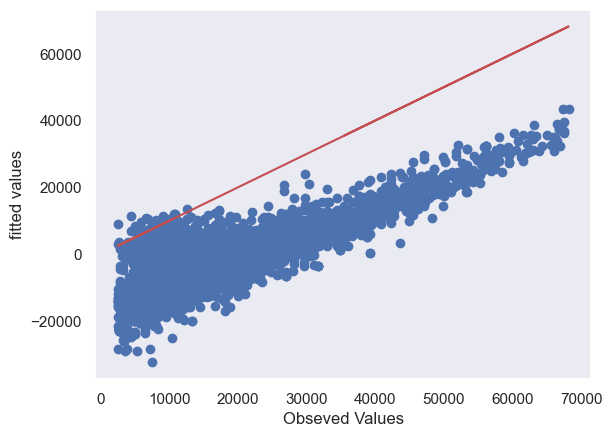

In [73]:
test_res= y_test - y_test_pred1
plt.scatter(y_test,test_res)
plt.plot(y_test,y_test,'r')
plt.xlabel('Obseved Values')
plt.ylabel('fitted values')
plt.show()

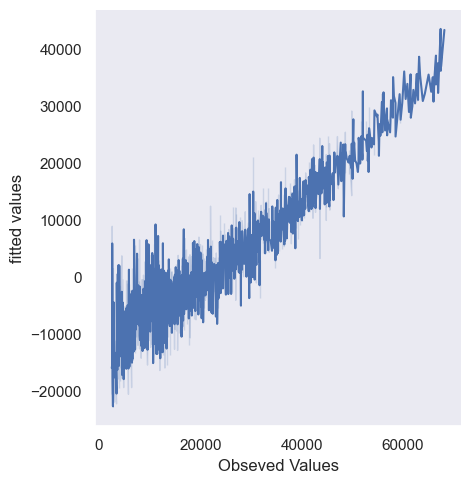

In [74]:
test_res=y_test - y_test_pred1
sns.relplot(x=y_test,y=test_res,kind='line')
#plt.plot(y_test,test_res)
plt.xlabel('Obseved Values')
plt.ylabel('fitted values')
plt.show()

#### Normality of Errors

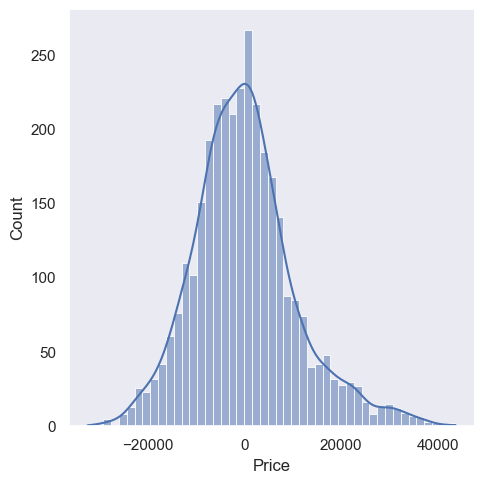

In [75]:
sns.displot(test_res,kde=True)
plt.show()

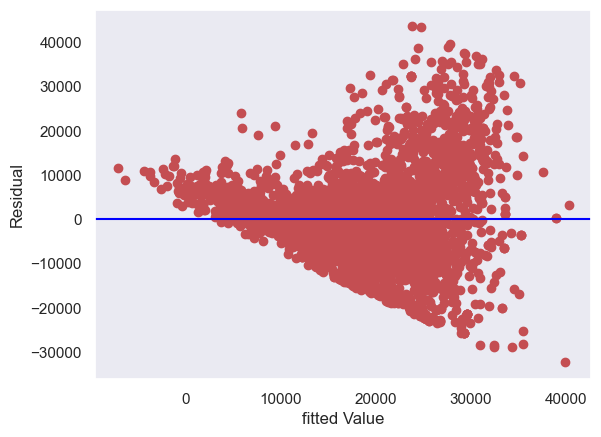

In [76]:
plt.scatter(y_test_pred1,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('fitted Value')
plt.ylabel('Residual')
plt.show()

#### Evaluation by OLS Method

In [77]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [78]:
reg_model=smf.OLS(endog=y_train,exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.097
Model:                            OLS   Adj. R-squared (uncentered):              0.096
Method:                 Least Squares   F-statistic:                              62.38
Date:                Tue, 19 Mar 2024   Prob (F-statistic):                   1.85e-203
Time:                        15:10:44   Log-Likelihood:                     -1.1246e+05
No. Observations:                9851   AIC:                                  2.250e+05
Df Residuals:                    9834   BIC:                                  2.251e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           552.2669    254.405      2.171      0.030      53.581    1050.952
x2          -135.1766    235.539     -0.574      0.566    -596.882     326.528
x3           738.3907    235.394      3.137      0.002     276.970    1199.811
x4         -1357.0345    248.123     -5.469      0.000   -1843.407    -870.662
x5           678.5054    264.314      2.567      0.010     160.397    1196.614
x6         -1469.1453    241.729     -6.078      0.000   -1942.984    -995.306
x7          2475.5751    337.132      7.343      0.000    1814.727    3136.423
x8         -1798.5338    244.170     -7.366      0.000   -2277.156   -1319.911
x9           -38.4300    297.905     -0.129      0.897    -622.384     545.524
x10         2178.6317    243.641      8.942      0.000    1701.045    2656.218
x11          692.7685    241.233      2.872      0.004     219.902    1165.635
x12         -694.6942   1151.146     -0.603      0.546   -2951.177    1561.788
x13         -906.6337    261.440     -3.468      0.001   -1419.109    -394.158
x14         -309.6552    225.167     -1.375      0.169    -751.028     131.717
x15        -1907.1454    254.180     -7.503      0.000   -2405.391   -1408.900
x16        -5805.7805    279.045    -20.806      0.000   -6352.766   -5258.795
x17         1025.3875   1137.096      0.902      0.367   -1203.554    3254.329
==============================================================================
Omnibus:                      659.361   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1005.462
Skew:                           0.551   Prob(JB):                    4.64e-219
Kurtosis:                       4.112   Cond. No.                         11.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Polynomial Regression

In [79]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x_poly=pf.fit_transform(x)
x_poly=pd.DataFrame(x_poly)

In [80]:
x_poly_train,x_poly_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.25,random_state=101)

In [81]:
model_pol=LinearRegression()
model_pol.fit(x_poly_train,y_train)
print(model_pol.intercept_)
print(model_pol.coef_)
train_poly_pred=model_pol.predict(x_poly_train)
test_poly_pred=model_pol.predict(x_poly_test)

22282.90424842952
[-1.33123368e-02  1.59091092e+01  3.54623067e+02  2.36921378e+00
 -3.63906224e+02  6.78207861e+03 -9.25071293e+03  2.60176121e+04
 -9.01864290e-02 -4.15464019e+03 -2.29651713e+03  1.31221310e+04
 -2.60767968e+02 -3.51996120e+03 -8.89573987e+02 -9.07442158e+02
 -2.67654933e+03  1.43685968e+02  2.77057888e-03  1.07105493e-02
  3.30713873e-03  4.56365944e-01  3.88845275e+00 -4.43410859e-01
 -1.04445598e+01  1.84736959e-05 -3.83181081e-01  1.18674333e+00
 -1.06935987e+00  4.42320754e+00 -1.07637666e+01  1.11672982e-01
 -4.50025561e-01 -6.05565325e-01 -7.67988723e+00 -3.06381154e+00
 -3.34124607e-02  1.00572320e+01 -6.77043537e+01 -2.83953865e+01
 -9.79355310e+01 -2.31396055e-04  6.25939930e+01 -3.07418373e+01
 -6.39683757e+01  1.80003950e+01 -7.86478817e+01 -1.21374466e+00
 -6.68622722e+00  1.73572244e+00 -3.03284581e+01  5.65643223e-03
 -8.26899593e-01  3.50757003e-01 -1.08720180e+00  1.12424193e+00
  2.82478595e-07 -5.19646213e-01  2.59708463e-01  2.46807059e+00
 -1.934

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('TEST SCORE:',model_pol.score(x_poly_test,y_test))
print('TRAIN SCORE:',model_pol.score(x_poly_train,y_train))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,test_poly_pred)))
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,train_poly_pred)))
print('MSE TEST:',mean_squared_error(y_test,test_poly_pred))
print('MSE TRAIN:',mean_squared_error(y_train,train_poly_pred))
print('MAE TEST:',mean_absolute_error(y_test,test_poly_pred))
print('MAE TRAIN:',mean_absolute_error(y_train,train_poly_pred))
print('r2_score TEST:',r2_score(y_test,test_poly_pred))
print('r2_score TRAIN:',r2_score(y_train,train_poly_pred))

TEST SCORE: 0.5327974867350687
TRAIN SCORE: 0.5546393340578502
RMSE TEST: 8885.668581357932
RMSE TRAIN: 8440.509374075778
MSE TEST: 78955106.13773148
MSE TRAIN: 71242198.4938611
MAE TEST: 6436.54975008435
MAE TRAIN: 6182.748485880169
r2_score TEST: 0.5327974867350687
r2_score TRAIN: 0.5546393340578502


In [83]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model_pol,x_poly,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

[0.53263351 0.50938175 0.55811921 0.53614899 0.5284289 ]
Cross Validation Score: 0.5329424702035952


### Decision Tree Regressor

In [132]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(random_state=42)
model2.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [133]:
y_train_pred2=model2.predict(x_train)
y_test_pred2=model2.predict(x_test)

#### Evaluation

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('TEST SCORE:',model2.score(x_test,y_test))
print('TRAIN SCORE:',model2.score(x_train,y_train))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred2)))
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred2)))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred2))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred2))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred2))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred2))
print('r2_score TEST:',r2_score(y_test,y_test_pred2))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred2))

TEST SCORE: 0.6054368949248652
TRAIN SCORE: 0.995433780167461
RMSE TEST: 8165.74402908858
RMSE TRAIN: 854.6555863594396
MSE TEST: 66679375.54859579
MSE TRAIN: 730436.1712953974
MAE TEST: 4681.870886398924
MAE TRAIN: 66.32980998462168
r2_score TEST: 0.6054368949248652
r2_score TRAIN: 0.995433780167461


#### Cross validation score

In [135]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

[0.58801883 0.5653819  0.61360242 0.62188823 0.58681114]
Cross Validation Score: 0.5951405047639764


#### Hyperparameter Tuning 

In [138]:
### Hyperparameter Tuning
#from sklearn.model_selection import GridSearchCV
#estimator2=DecisionTreeRegressor()  # {'criterion': 'squared_error', 'max_depth': 3, 'max_leaf_nodes': 7}
#param_grid={'criterion' :["squared_error", "friedman_mse", "absolute_error","poisson"],'max_depth':[2,3,4,5],'max_leaf_nodes':[4,5,6,7]} 
#model_hp4=GridSearchCV(estimator2,param_grid,cv=5)
#model_hp4.fit(x_train,y_train)
#model_hp4.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'max_leaf_nodes': 7}

In [141]:
# Ater Hyperparameter Tuning
model2=DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_leaf_nodes=7,random_state=42)
model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=7, random_state=42)

In [143]:
# Ater Hyperparameter Tuning
model2=DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_leaf_nodes=7,random_state=42)
model2.fit(x_train,y_train)
## Prediction
y_train_pred2=model2.predict(x_train)
y_test_pred2=model2.predict(x_test)
## Evaluation
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred2)))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred2)))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred2))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred2))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred2))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred2))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred2))
print('r2_score TEST:',r2_score(y_test,y_test_pred2))
# Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

RMSE TRAIN: 10278.420242651433
RMSE TEST: 10494.91821142229
MSE TRAIN: 105645922.68454675
MSE TEST: 110143308.26444322
MAE TRAIN: 7393.832913802378
MAE TEST: 7573.471709669312
r2_score TRAIN: 0.33956925143295613
r2_score TEST: 0.3482469601054673
[0.34630206 0.3479133  0.34252649 0.33307797 0.30666037]
Cross Validation Score: 0.33529603772525307


### Lasso Regression

In [90]:
from sklearn.linear_model import Lasso
model3=Lasso()
model3.fit(x_train,y_train)

Lasso()

In [92]:
# Prediction 
y_test_pred3= model3.predict(x_test)
y_train_pred3=model3.predict(x_train)
# Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred3)))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred3)))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred3))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred3))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred3))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred3))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred3))
print('r2_score TEST:',r2_score(y_test,y_test_pred3))

TRAIN SCORE: 0.3253760384422886
TEST SCORE: 0.33687693834276733
RMSE TRAIN: 10388.279094070575
RMSE TEST: 10586.06585957073
MSE TRAIN: 107916342.53630377
MSE TEST: 112064790.38316897
MAE TRAIN: 7812.169388159016
MAE TEST: 7997.76607036445
r2_score TRAIN: 0.3253760384422886
r2_score TEST: 0.33687693834276733


In [100]:
### Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
estimator3=Lasso()
param_grid={"alpha":[1.5,1.6,1.7,1.8,1.9,2.0,2.5,3.0]} # 1.7
model_hp3=GridSearchCV(estimator3,param_grid,cv=5)
model_hp3.fit(x_train,y_train)
model_hp3.best_params_

{'alpha': 1.7}

#### After Hyperparameter Tuning

In [106]:
model3=Lasso(alpha=1.7)
model3.fit(x_train,y_train)

Lasso(alpha=1.7)

In [108]:
# Prediction 
y_test_pred3= model3.predict(x_test)
y_train_pred3=model3.predict(x_train)
# Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred3)))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred3)))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred3))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred3))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred3))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred3))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred3))
print('r2_score TEST:',r2_score(y_test,y_test_pred3))
# Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model3,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

RMSE TRAIN: 10388.290424458723
RMSE TEST: 10586.11763940391
MSE TRAIN: 107916577.94290079
MSE TEST: 112065886.67529863
MAE TRAIN: 7811.808545754759
MAE TEST: 7997.396748676213
r2_score TRAIN: 0.32537456683078536
r2_score TEST: 0.3368704512330247
[0.3287608  0.33224728 0.34345237 0.31527548 0.31476762]
Cross Validation Score: 0.32690070712137426


### Ridge Regression

In [109]:
from sklearn.linear_model import Ridge
model4=Ridge()
model4.fit(x_train,y_train)
## Prediction
y_train_pred4=model4.predict(x_train)
y_test_pred4=model4.predict(x_test)

In [112]:
## Evaluation
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred4)))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred4)))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred4))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred4))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred4))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred4))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred4))
print('r2_score TEST:',r2_score(y_test,y_test_pred4))

RMSE TRAIN: 10388.273187832565
RMSE TEST: 10586.018815858346
MSE TRAIN: 107916219.82504097
MSE TEST: 112063794.36970693
MAE TRAIN: 7812.56769112161
MAE TEST: 7998.183244732285
r2_score TRAIN: 0.32537680555463044
r2_score TEST: 0.3368828320716909


In [118]:
### Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
estimator4=Ridge()
param_grid={'alpha':[49.1,49.2,49.3,49.4,49.5,49.6,49.7,49.8,49.9]} # 49.1
model_hp4=GridSearchCV(estimator4,param_grid,cv=5)
model_hp4.fit(x_train,y_train)
model_hp4.best_params_

{'alpha': 49.1}

In [120]:
## After Hyperparameter Tuning
model4=Ridge(alpha=49.1)
model4.fit(x_train,y_train)
## Prediction
y_train_pred4=model4.predict(x_train)
y_test_pred4=model4.predict(x_test)
## Evaluation
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred4)))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred4)))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred4))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred4))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred4))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred4))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred4))
print('r2_score TEST:',r2_score(y_test,y_test_pred4))
# Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model4,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

RMSE TRAIN: 10388.445156057976
RMSE TEST: 10587.218704335186
MSE TRAIN: 107919792.76042442
MSE TEST: 112089199.89342481
MAE TRAIN: 7807.030895612368
MAE TEST: 7993.208017861311
r2_score TRAIN: 0.32535446984748795
r2_score TEST: 0.33673249949521256
[0.32885267 0.33225772 0.34338573 0.31521731 0.31461648]
Cross Validation Score: 0.32686598142675544


### ElasticNet Regression

In [123]:
from sklearn.linear_model import ElasticNet
model5=ElasticNet()
model5.fit(x_train,y_train)
# Prediction
y_train_pred5=model5.predict(x_train)
y_test_pred5=model5.predict(x_test)
## Evaluation
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred5)))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred5)))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred5))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred5))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred5))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred5))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred5))
print('r2_score TEST:',r2_score(y_test,y_test_pred5))
# Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model5,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

RMSE TRAIN: 10698.545866024027
RMSE TEST: 10986.613559416755
MSE TRAIN: 114458883.64741983
MSE TEST: 120705677.50396012
MAE TRAIN: 7792.02424781723
MAE TEST: 8086.987328276544
r2_score TRAIN: 0.28447625533899745
r2_score TEST: 0.2857460567930691
[0.30463039 0.31306132 0.31565268 0.29239512 0.29018687]
Cross Validation Score: 0.30318527668969786


In [127]:
### Hyperparameter Tuning
#estimator5=ElasticNet()
#param_grid={"alpha":[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1],'l1_ratio':[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1]} # {'alpha': 0.1, 'l1_ratio': 0.9}
#model_hp5=GridSearchCV(estimator5,param_grid,cv=5)
#model_hp5.fit(x_train,y_train)
#model_hp5.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

In [128]:
## After Hyperparameter Tuning
model5=ElasticNet(alpha=0.1,l1_ratio=0.9)
model5.fit(x_train,y_train)
# Prediction
y_train_pred5=model5.predict(x_train)
y_test_pred5=model5.predict(x_test)
## Evaluation
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred5)))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred5)))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred5))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred5))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred5))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred5))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred5))
print('r2_score TEST:',r2_score(y_test,y_test_pred5))
# Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model5,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

RMSE TRAIN: 10388.88286192624
RMSE TEST: 10588.903785345952
MSE TRAIN: 107928887.11882477
MSE TEST: 112124883.37531383
MAE TRAIN: 7801.71378821203
MAE TEST: 7988.85531065419
r2_score TRAIN: 0.3252976177345672
r2_score TEST: 0.33652134896630925
[0.32874774 0.33228591 0.34320674 0.31511482 0.31441797]
Cross Validation Score: 0.32675463662923976


### Random Forest Regressor

In [148]:
from sklearn.ensemble import RandomForestRegressor
model6=RandomForestRegressor()
model6.fit(x_train,y_train)
#prediction
y_train_pred6=model6.predict(x_train)
y_test_pred6=model6.predict(x_test)
## Evaluation
print('RMSE TRAIN:', np.sqrt(mean_squared_error(y_train,y_train_pred6)))
print('RMSE TEST:', np.sqrt(mean_squared_error(y_test,y_test_pred6)))
print('MSE TRAIN:',mean_squared_error(y_train,y_train_pred6))
print('MSE TEST:',mean_squared_error(y_test,y_test_pred6))
print('MAE TRAIN:',mean_absolute_error(y_train,y_train_pred6))
print('MAE TEST:',mean_absolute_error(y_test,y_test_pred6))
print('r2_score TRAIN:',r2_score(y_train,y_train_pred6))
print('r2_score TEST:',r2_score(y_test,y_test_pred6))
# Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model6,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('Cross Validation Score:',cv_score)

RMSE TRAIN: 2313.836354849368
RMSE TEST: 6141.751169771763
MSE TRAIN: 5353838.677022611
MSE TEST: 37721107.43139281
MAE TRAIN: 1364.5526897412196
MAE TEST: 3745.965396988658
r2_score TRAIN: 0.966531224345202
r2_score TEST: 0.7767921917001737
[0.78292443 0.78572443 0.80842972 0.79516821 0.78302923]
Cross Validation Score: 0.7910552027352086


In [163]:
## Hyperparameter Tuning
#from sklearn.model_selection import GridSearchCV
#estimator6=RandomForestRegressor()  #{'n_estimators': 93,'criterion' :"squared_error",'max_depth': 7, 'max_leaf_nodes': 7}}
#param_grid={'n_estimators':list(range(85,95),'max_depth':[5,6,7,8],'max_leaf_nodes':[4,5,6,7]}
#model_hp6=GridSearchCV(estimator4,param_grid,cv=5)
#model_hp6.fit(x_train,y_train)
#model_hp6.best_params_

#### Observations:

##### We can observe that we get 97% Training accuracy and 77% Testing accuracy while using the RFRegressor

##### We can conclude that we get the best accuracy when we use RandomForest Regressor as compared to other models such as Linear Regression and DecisionTree Regressor